# Statistical distributions

In [5]:
#install.packages("tidyverse")
#install.packages("lubridate")
#install.packages("openxlsx")
#install.packages("Hmisc")
#install.packages("fitdistrplus")

In [8]:
library(tidyverse)
library(tidyr)
library(dplyr)
library(ggplot2)
library(readxl)
library(openxlsx)
library(lattice)
library(fitdistrplus)

In [9]:
version

               _                                
platform       x86_64-w64-mingw32               
arch           x86_64                           
os             mingw32                          
crt            ucrt                             
system         x86_64, mingw32                  
status                                          
major          4                                
minor          3.3                              
year           2024                             
month          02                               
day            29                               
svn rev        86002                            
language       R                                
version.string R version 4.3.3 (2024-02-29 ucrt)
nickname       Angel Food Cake                  

In [28]:
# Read a CSV file into a data frame
df <- read.csv("Data/All_dat_df.csv")
head(df)

,site,datetime,year,month,day,hour,dayofwk,daytype,season,O3,⋯,NOX,TEMP,PREC,RAD,SO2,PM2.5,EC,CPC,avg_wind_speed,avg_wind_direction
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,57.7,⋯,1.9,-2.2,0,-0.6,NA,NA,NA,NA,1.0980000,36.25794
2,DAV,2024-01-01 01:00:00,2024,1,1,1,Mon,Weekday,Winter,55.2,⋯,2.1,-2.8,0,-0.7,NA,NA,NA,NA,0.9216667,40.71351
3,DAV,2024-01-01 02:00:00,2024,1,1,2,Mon,Weekday,Winter,49.9,⋯,3.7,-3.3,0,-0.7,NA,NA,NA,NA,0.6716667,150.12313
4,DAV,2024-01-01 03:00:00,2024,1,1,3,Mon,Weekday,Winter,52.1,⋯,4.6,-4.2,0,-1.1,NA,NA,NA,NA,0.5250000,40.87731
5,DAV,2024-01-01 04:00:00,2024,1,1,4,Mon,Weekday,Winter,65.8,⋯,0.7,-5.2,0,-1.3,NA,NA,NA,NA,1.4700000,186.90946
6,DAV,2024-01-01 05:00:00,2024,1,1,5,Mon,Weekday,Winter,67.1,⋯,0.7,-5.6,0,-0.8,NA,NA,NA,NA,1.9350000,184.88936


In [24]:
# Access column names
colnames(df)
variables <- c('O3','NO2','PM10','NOX','TEMP','PREC','RAD','SO2','PM2.5','EC','CPC','avg_wind_speed','avg_wind_direction')

[1] "site"               "datetime"           "year"              
 [4] "month"              "day"                "hour"              
 [7] "dayofwk"            "daytype"            "season"            
[10] "O3"                 "NO2"                "PM10"              
[13] "NOX"                "TEMP"               "PREC"              
[16] "RAD"                "SO2"                "PM2.5"             
[19] "EC"                 "CPC"                "avg_wind_speed"    
[22] "avg_wind_direction"

## DAVOS 

In [12]:
lf <- pivot_longer(df, all_of(variables), names_to = "variable", values_to = "value")
daily.max <- lf %>%
  group_by(site, year, month, day, season, variable) %>%
  summarize(value = max(value, na.rm=TRUE), .groups = "drop") %>%
  pivot_wider(names_from = variable, values_from = value)

Warning message:
"There were 1487 warnings in `summarize()`.
The first warning was:
ℹ In argument: `value = max(value, na.rm = TRUE)`.
ℹ In group 170: `site = "BAS"`, `year = 2024`, `month = 1`, `day = 14`, `season = "Winter"`, `variable = "CPC"`.
Caused by warning in `max()`:
! aucun argument pour max ; -Inf est renvoyé
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1486 remaining warnings."


[1] "O3"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate  Std. Error
meanlog 4.1169930 0.010849449
sdlog   0.2957346 0.007671324
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.06202067
Cramer-von Mises statistic    0.67872649
Anderson-Darling statistic    4.84529609

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    6420.011
Bayesian Information Criterion    6429.232
[1] "NO2"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 0.2636739 0.01535083
sdlog   0.4175877 0.01085439
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.07287278
Cramer-von Mises statistic    0.55953973
Anderson-Darling statistic    3.24808631

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    1201.840
Bayesian 

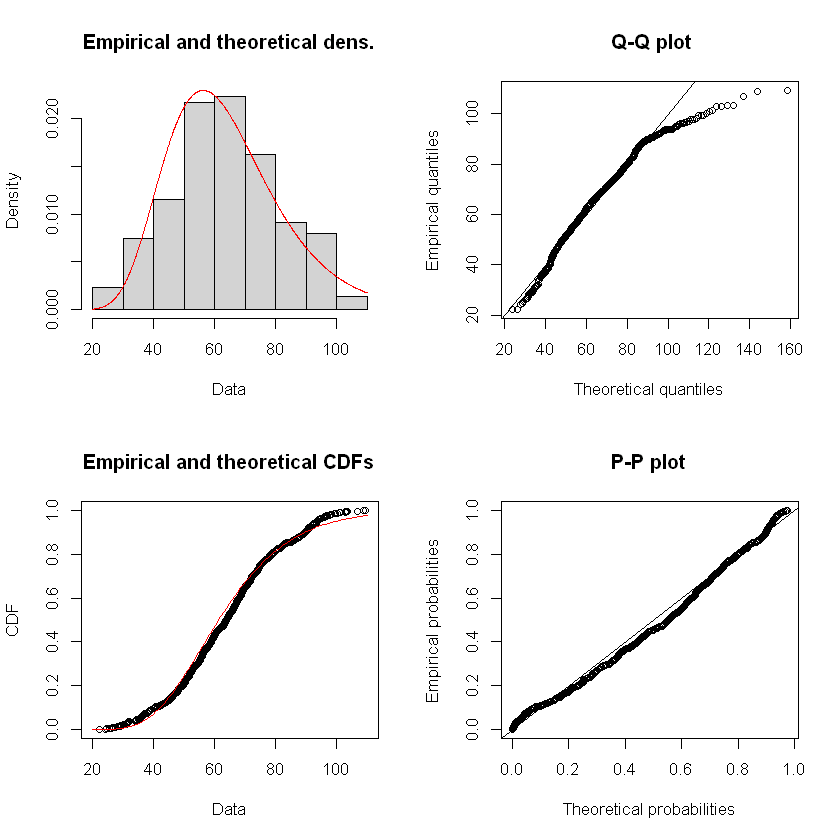

[1] "PM10"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.6401445 0.02828777
sdlog   0.7715875 0.02000232
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic   0.0519010
Cramer-von Mises statistic     0.6558602
Anderson-Darling statistic     4.0857141

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    4170.069
Bayesian Information Criterion    4179.293


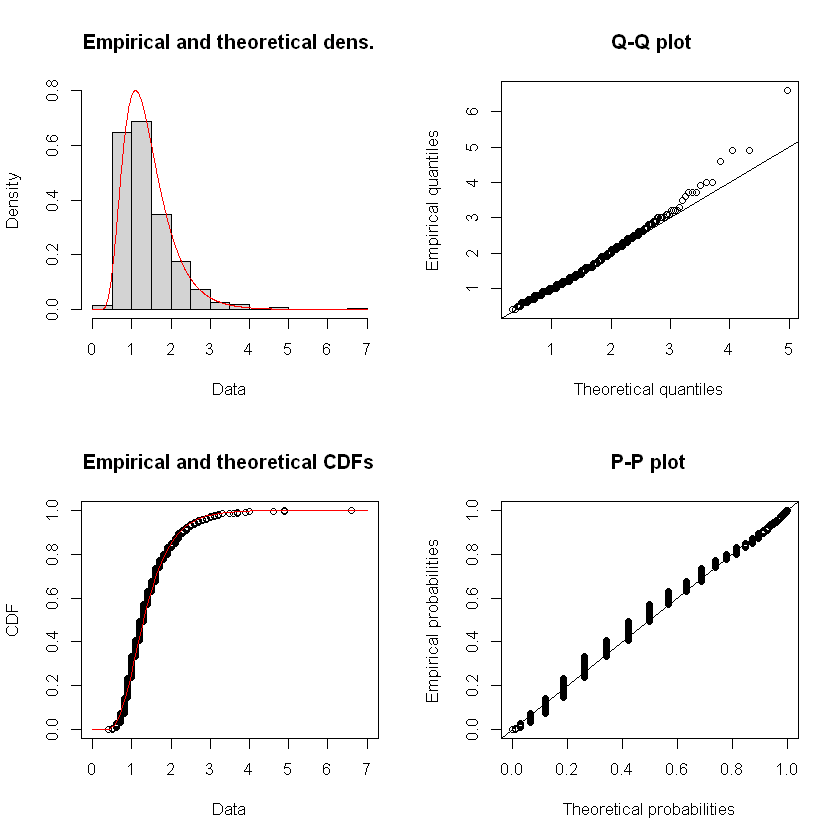

[1] "NOX"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 0.3690148 0.01544954
sdlog   0.4202731 0.01092420
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.07561189
Cramer-von Mises statistic    0.72340654
Anderson-Darling statistic    4.29441614

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    1367.232
Bayesian Information Criterion    1376.445


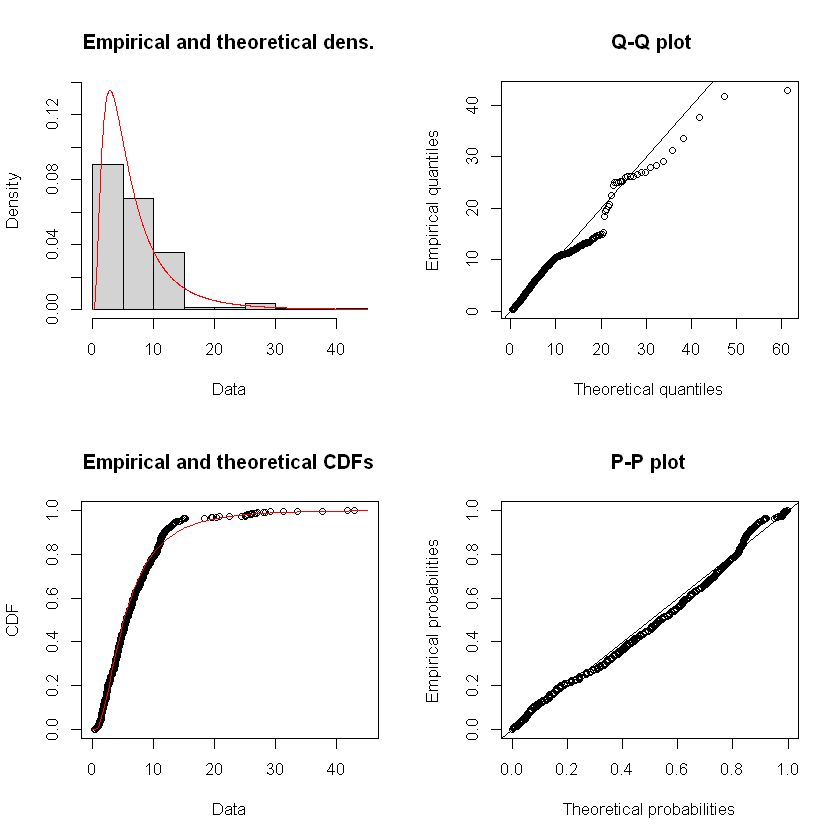

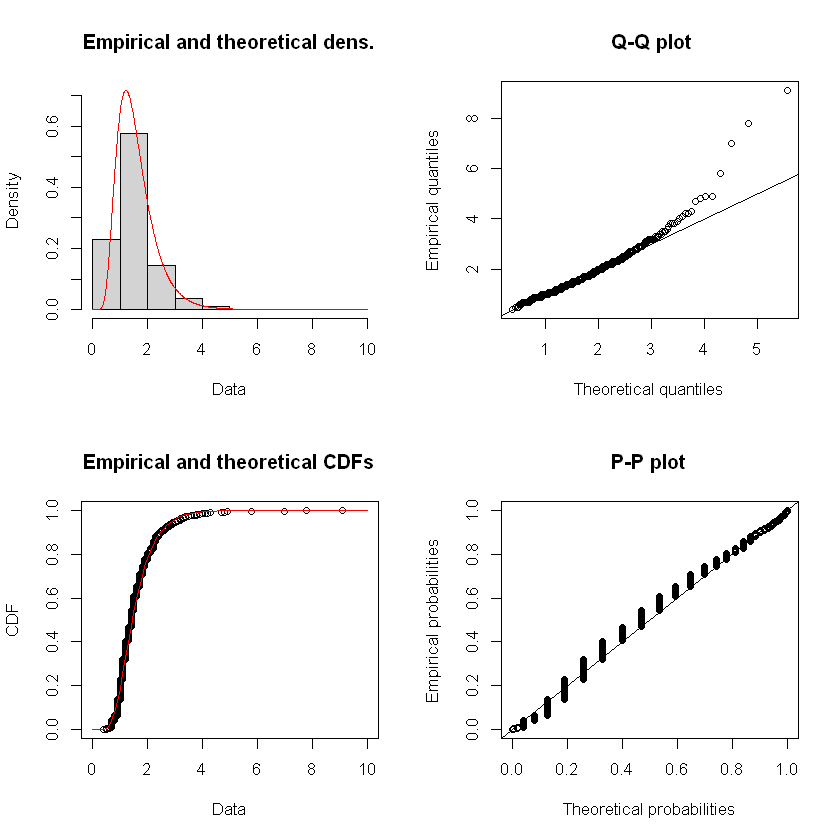

In [23]:
variables_DAV <- c('O3','NO2','PM10', 'NOX')
for (var in variables_DAV) {
    concvec <- lf %>% 
      filter(site=="DAV" & month==7 & variable==var) %>%
      {c(na.omit(.[["value"]]))}
    fit <- fitdist(concvec, "lnorm")

    print(var)
    print(fit)
    print(gofstat(fit))
    (pval.h <- gofstat(fit)[["chisqpvalue"]])
    plot(fit)
    }

## BASEL

[1] "O3"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 4.0957842 0.01631577
sdlog   0.4444363 0.01153673
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic   0.0462053
Cramer-von Mises statistic     0.4594990
Anderson-Darling statistic     3.1942465

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    6984.401
Bayesian Information Criterion    6993.619
[1] "NO2"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.6402568 0.02490638
sdlog   0.6784418 0.01761130
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.06640648
Cramer-von Mises statistic    0.75822770
Anderson-Darling statistic    4.76118683

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    3968.118
Bayesian Inf

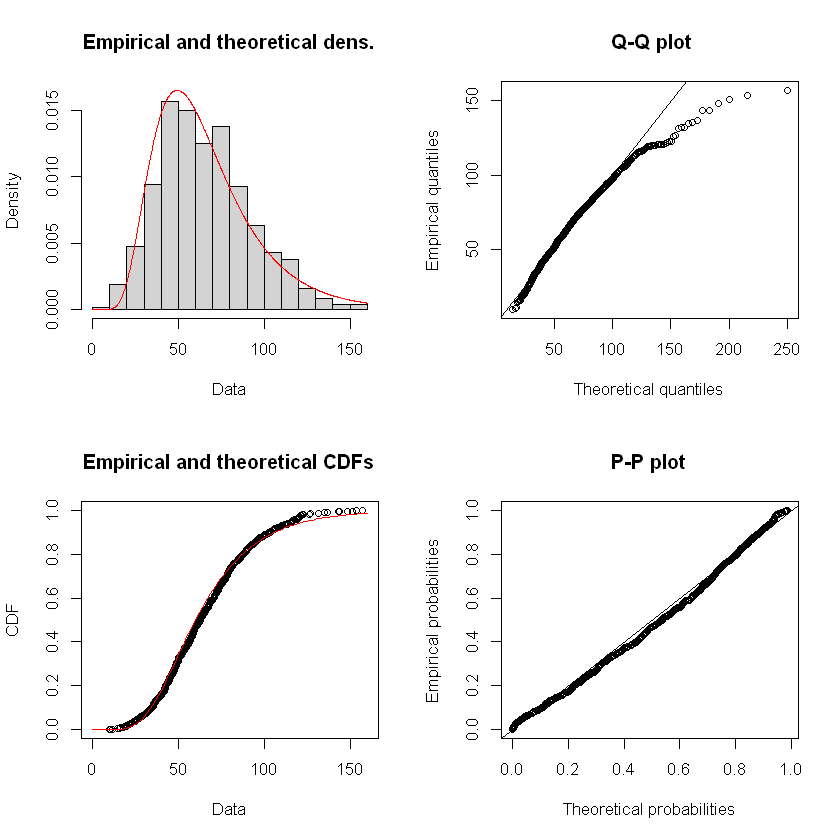

[1] "PM10"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 2.4077351 0.01458432
sdlog   0.3978073 0.01031238
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.02555342
Cramer-von Mises statistic    0.08857786
Anderson-Darling statistic    0.68232716

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    4326.471
Bayesian Information Criterion    4335.695


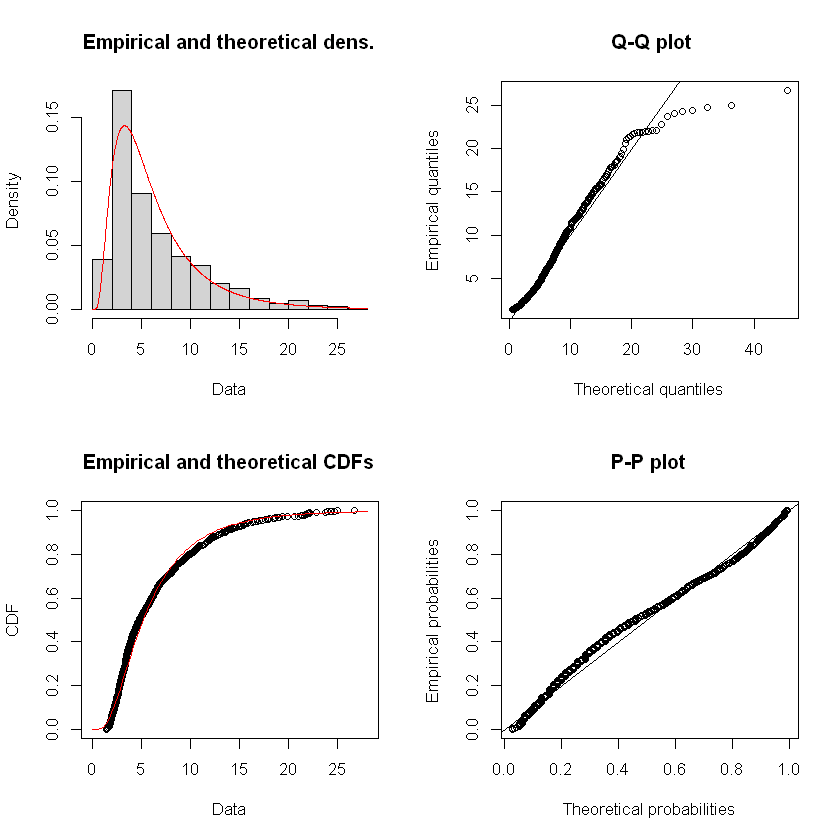

[1] "NOX"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.7623842 0.02550067
sdlog   0.6946301 0.01803153
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.07231119
Cramer-von Mises statistic    0.80616033
Anderson-Darling statistic    4.93719201

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    4184.349
Bayesian Information Criterion    4193.568


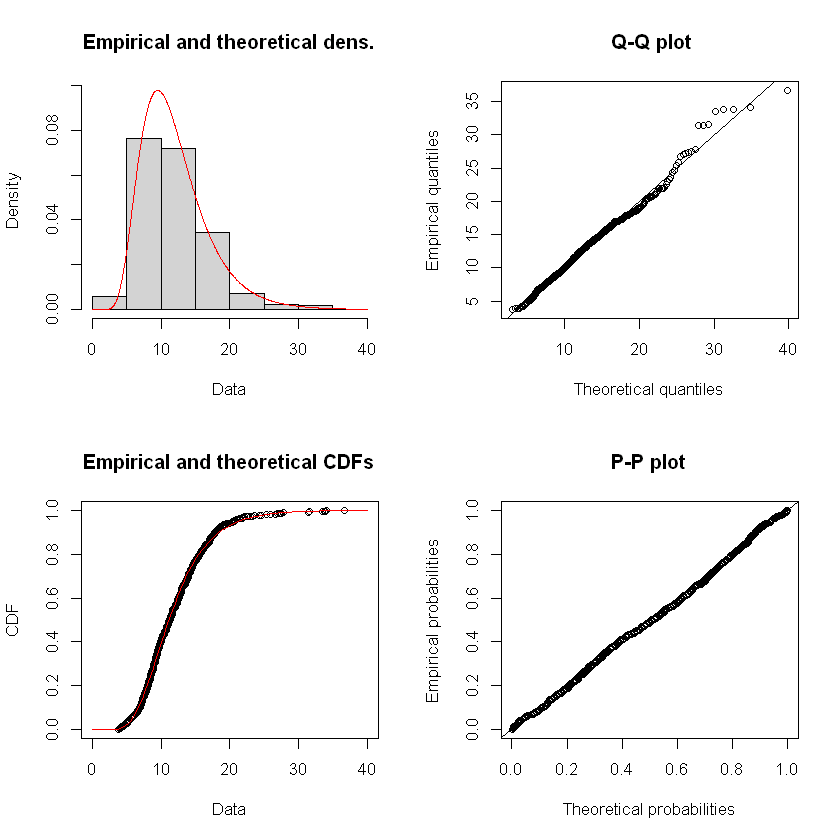

Error in computing default starting values.


ERROR: Error in manageparam(start.arg = start, fix.arg = fix.arg, obs = data, : Error in startargdefault(obs, distname) : 
  values must be positive to fit a lognormal distribution



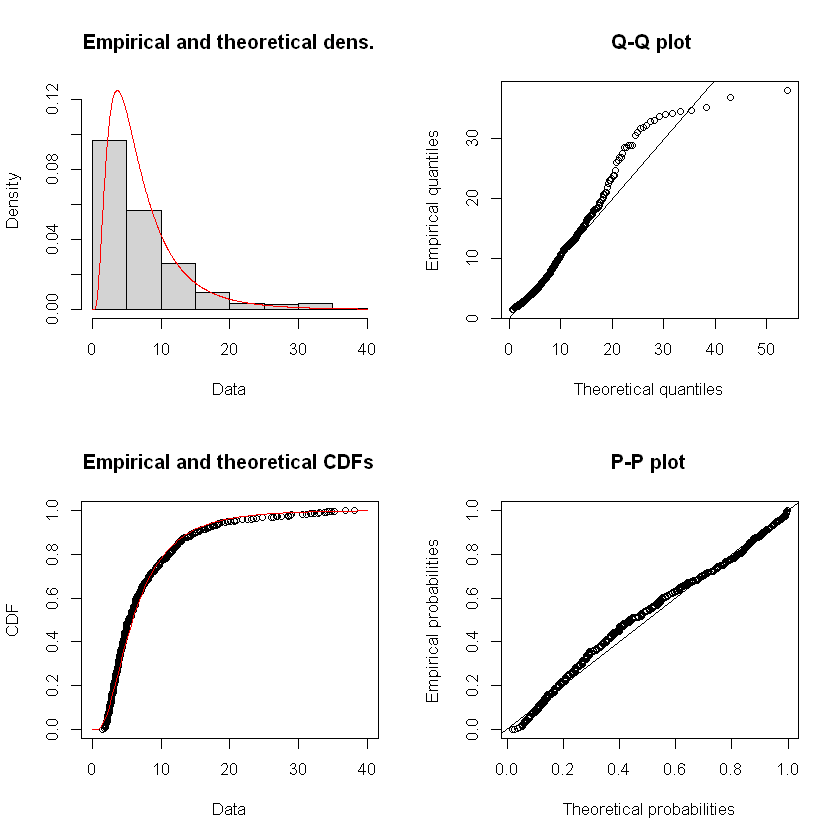

In [27]:
variables_BAS <- c('O3','NO2','PM10','NOX','EC','CPC', 'SO2','PM2.5')
for (var in variables_BAS) {
    concvec <- lf %>% 
      filter(site=="BAS" & month==7 & variable==var) %>%
      {c(na.omit(.[["value"]]))}
    fit <- fitdist(concvec, "lnorm")

    print(var)
    print(fit)
    print(gofstat(fit))
    (pval.h <- gofstat(fit)[["chisqpvalue"]])
    plot(fit)
    }

[1] "PM2.5"
Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters:
         estimate Std. Error
meanlog 1.5937664 0.01752949
sdlog   0.4781409 0.01239498
Goodness-of-fit statistics
                             1-mle-lnorm
Kolmogorov-Smirnov statistic  0.05132633
Cramer-von Mises statistic    0.27994998
Anderson-Darling statistic    1.69030322

Goodness-of-fit criteria
                               1-mle-lnorm
Akaike's Information Criterion    3388.984
Bayesian Information Criterion    3398.208


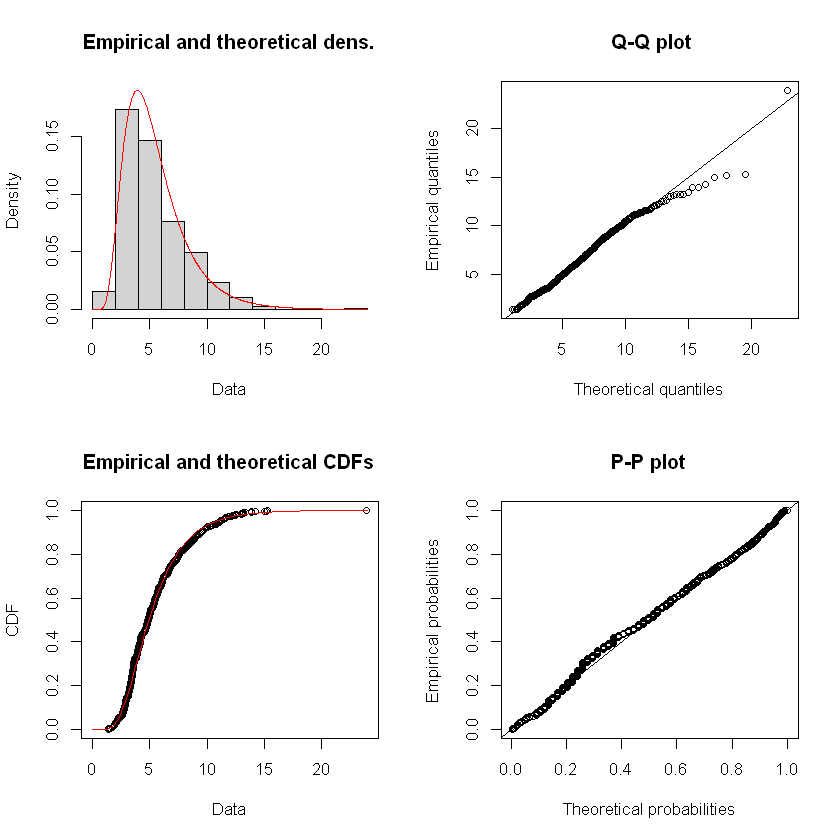

In [32]:
variables_BAS <- c('PM2.5')
for (var in variables_BAS) {
    concvec <- lf %>% 
      filter(site=="BAS" & month==7 & variable==var) %>%
      {c(na.omit(.[["value"]]))}
    fit <- fitdist(concvec, "lnorm")

    print(var)
    print(fit)
    print(gofstat(fit))
    (pval.h <- gofstat(fit)[["chisqpvalue"]])
    plot(fit)
    }